In [2]:
# Make sure proper docker container is installed for 
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pyathena import connect
from pyathena.pandas_cursor import PandasCursor
ATHENA_RESULTS = os.environ["ATHENA_RESULTS"]
pf = os.environ['AWS_LP']
ATHENA_CURSOR = connect(s3_staging_dir=ATHENA_RESULTS,
                        region_name='us-east-1',
                        profile_name=pf,
                        cursor_class=PandasCursor).cursor()

In [3]:
query = f'''
    SELECT location_desc, 
            value, 
            domaincat_desc
    FROM crop_data.usda_crop_data
    WHERE year = 2017
'''
df = ATHENA_CURSOR.execute(query).as_pandas()

In [4]:
len(df.columns)

3

In [5]:
df.head()

,location_desc,value,domaincat_desc
0,DELAWARE,"1,647,000",ORGANIZATION: (INSTITUTIONAL & RESEARCH & RESE...
1,DELAWARE,"492,873,000","ORGANIZATION: (TAX PURPOSES, CORPORATION)"
2,DELAWARE,"57,576,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC..."
3,DELAWARE,"57,576,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, (EXC..."
4,DELAWARE,"435,297,000","ORGANIZATION: (TAX PURPOSES, CORPORATION, FAMI..."


In [6]:
t = (
    df.loc[
        (~df['location_desc'].str.contains(',')) &
        (df['domaincat_desc'].str.contains('IRRIGATION'))
    ]
    .pivot(index='domaincat_desc', columns='location_desc', values='value')
    .reset_index()
    .rename_axis(None, axis=1)
    .replace(to_replace=r',', value='', regex=True)
    .set_index('domaincat_desc')
    .apply(pd.to_numeric)
)
tt = (t/t.sum()).transpose().sort_values("IRRIGATION STATUS: (NONE ON OPERATION)", ascending=False)
tt.head()

domaincat_desc,IRRIGATION STATUS: (ANY ON OPERATION),IRRIGATION STATUS: (HARVESTED CROPLAND IS ENTIRELY IRRIGATED),IRRIGATION STATUS: (NONE ON OPERATION)
IOWA,0.035864,0.004206,0.959930
NORTH DAKOTA,0.083086,0.008937,0.907977
WEST VIRGINIA,0.067256,0.033463,0.899282
VERMONT,0.082267,0.019014,0.898720
MINNESOTA,0.103812,0.012910,0.883279


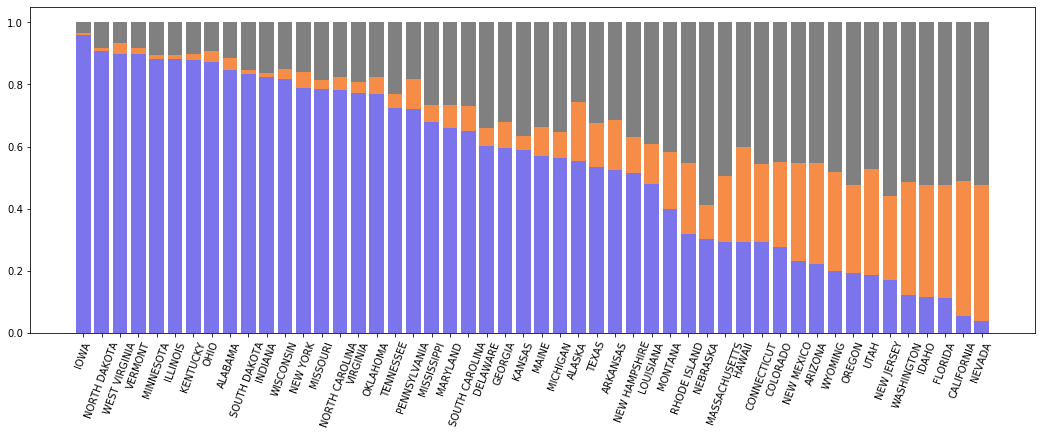

In [220]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=70)
p1 = plt.bar(tt.index, tt['IRRIGATION STATUS: (NONE ON OPERATION)'], color='#7b74ea')
p2 = plt.bar(tt.index, tt['IRRIGATION STATUS: (HARVESTED CROPLAND IS ENTIRELY IRRIGATED)'], bottom=tt['IRRIGATION STATUS: (NONE ON OPERATION)'], color='#f58c48')
p3 = plt.bar(tt.index, tt['IRRIGATION STATUS: (ANY ON OPERATION)'], bottom = tt['IRRIGATION STATUS: (HARVESTED CROPLAND IS ENTIRELY IRRIGATED)'] +
            tt['IRRIGATION STATUS: (NONE ON OPERATION)'], color='grey')


In [172]:
np.arange(50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])